<a href="https://colab.research.google.com/github/adeni-7007/low-code-book-projects/blob/main/Booking_Cancellation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import tensorflow as tf

In [2]:
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)

numpy version: 1.23.5
pandas version: 1.5.3
seaborn version: 0.12.2
scikit-learn version: 1.2.2
TensorFlow version: 2.14.0


In [86]:
booking_df = pd.read_csv('/content/booking.csv', error_bad_lines = True, engine = 'python')
booking_df.head()

<ipython-input-86-148aea60f48b>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  booking_df = pd.read_csv('/content/booking.csv', error_bad_lines = True, engine = 'python')


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [87]:
booking_df.dtypes

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object

dtypes без скобок, потому что это не функция, а свойство ддата-фрейма Пандас df_raw

In [88]:
booking_df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [89]:
a = list(booking_df)
print(a)

['Booking_ID', 'number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'date of reservation', 'booking status']


можно работать с отдельным столбцом данных:

In [90]:
booking_df['average price'].describe()

count    36285.000000
mean       103.421636
std         35.086469
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: average price, dtype: float64

In [91]:
booking_df['booking status'].describe()

count            36285
unique               2
top       Not_Canceled
freq             24396
Name: booking status, dtype: object

In [92]:
booking_df['date of reservation'].describe()

count          36285
unique           553
top       10/13/2018
freq             254
Name: date of reservation, dtype: object

In [93]:
mask = (booking_df['average price']==' ')
booking_df[mask]

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status


In [95]:
mask = (booking_df['average price']==0)
booking_df[mask]

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,Complementary,0,0,0,0.0,1,9/10/2017,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,Complementary,1,3,5,0.0,1,6/1/2018,Not_Canceled
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,Complementary,0,0,0,0.0,1,2/27/2018,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,Complementary,1,0,1,0.0,1,8/12/2017,Not_Canceled
267,INN00268,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,Complementary,0,0,0,0.0,1,8/23/2017,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,Complementary,1,4,17,0.0,1,6/7/2018,Not_Canceled
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,Complementary,1,3,15,0.0,1,3/21/2018,Not_Canceled
36114,INN36115,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,0.0,0,3/2/2018,Not_Canceled
36217,INN36218,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,Online,0,0,0,0.0,2,8/9/2017,Not_Canceled


In [108]:
booking_df = booking_df.replace({'booking status': {'Canceled': 'Yes'}})
booking_df = booking_df.replace({'booking status': {'Not_Canceled': 'No'}})
booking_df[['booking status']].nunique()


booking status    2
dtype: int64

In [96]:
booking_df = booking_df.astype({'average price': 'float64'})
booking_df.dtypes

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object

In [97]:
booking_df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [98]:
booking_df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [99]:
booking_df.describe(include='object')

,Booking_ID,type of meal,room type,market segment type,date of reservation,booking status
count,36285,36285,36285,36285,36285,36285
unique,36285,4,7,5,553,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,10/13/2018,Not_Canceled
freq,1,27842,28138,23221,254,24396


In [100]:
booking_df.value_counts(['number of week nights','number of weekend nights'])

number of week nights  number of weekend nights
2                      0                           5747
1                      0                           5082
3                      0                           4180
2                      1                           3407
1                      2                           2466
2                      2                           2293
3                      1                           2074
1                      1                           1940
3                      2                           1588
4                      0                           1530
0                      1                           1522
5                      2                            974
0                      2                            787
4                      1                            744
                       2                            718
5                      1                            313
                       0                            259


In [109]:
booking_df.value_counts(['market segment type','booking status'])

market segment type  booking status
Online               No                14743
                     Yes                8478
Offline              No                 7377
                     Yes                3154
Corporate            No                 1797
Complementary        No                  391
Corporate            Yes                 220
Aviation             No                   88
                     Yes                  37
dtype: int64

In [110]:
booking_df.value_counts(['market segment type','booking status'])

market segment type  booking status
Online               No                14743
                     Yes                8478
Offline              No                 7377
                     Yes                3154
Corporate            No                 1797
Complementary        No                  391
Corporate            Yes                 220
Aviation             No                   88
                     Yes                  37
dtype: int64

In [111]:
booking_df.value_counts(['booking status', 'special requests'])

booking status  special requests
No              0                   11233
                1                    8674
Yes             0                    8547
No              2                    3727
Yes             1                    2705
No              3                     676
Yes             2                     637
No              4                      78
                5                       8
dtype: int64

In [112]:
booking_df.value_counts(['P-C','booking status'])

P-C  booking status
0    No                24074
     Yes               11873
1    No                  187
2    No                   46
3    No                   42
11   No                   25
1    Yes                  11
5    No                   11
4    No                   10
13   Yes                   4
3    Yes                   1
6    No                    1
dtype: int64

In [113]:
booking_df.value_counts(['P-not-C','booking status'])

P-not-C  booking status
0        No                23591
         Yes               11882
1        No                  224
2        No                  112
3        No                   80
                           ...  
35       No                    1
34       No                    1
33       No                    1
4        Yes                   1
58       No                    1
Length: 64, dtype: int64

In [48]:
#df_2.value_counts(['InternetService', 'DeviceProtection'])

In [49]:
#df_2.value_counts(['InternetService', 'TechSupport'])

In [50]:
#df_2.value_counts(['Contract', 'Churn'])

<Axes: xlabel='market segment type'>

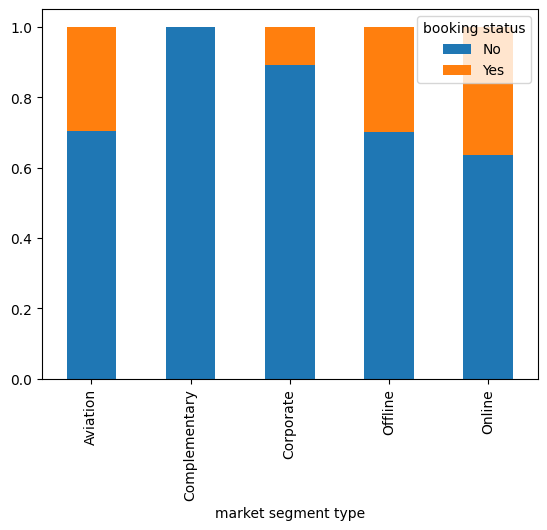

In [114]:
(booking_df.groupby('market segment type')['booking status'].value_counts(normalize=True).unstack('booking status').plot.bar(stacked=True))

In [115]:
def plot_cat_feature_dist(feature_name):
  booking_df.groupby(feature_name)['booking status'].value_counts(normalize=True).unstack('booking status').plot.bar(stacked=True)

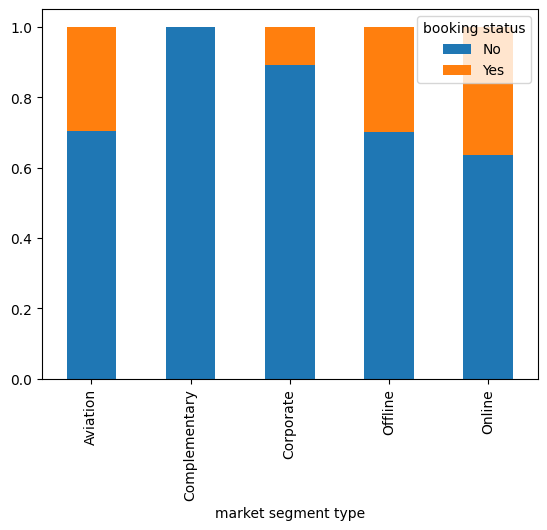

In [116]:
plot_cat_feature_dist('market segment type')

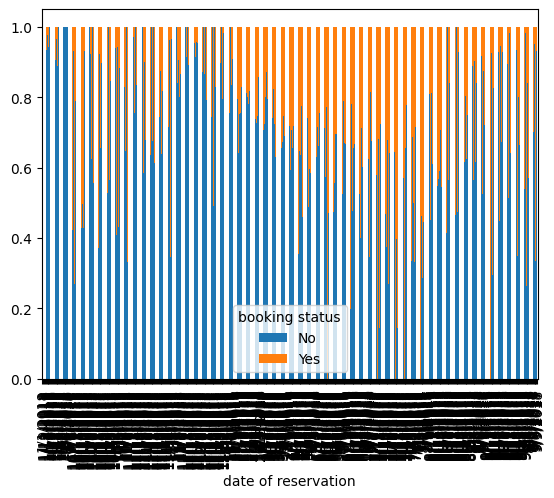

In [117]:
plot_cat_feature_dist('date of reservation')

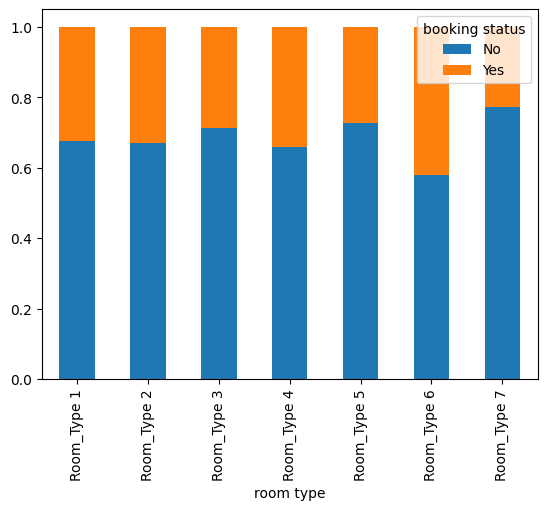

In [118]:
plot_cat_feature_dist('room type')

In [119]:
booking_df_1 = booking_df.copy()
booking_df_1 = booking_df_1.drop(columns=['date of reservation', 'average price'])
booking_df_1.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'special requests', 'booking status'],
      dtype='object')

Удаляем лишние столбцы с помощью panda.drop

In [ ]:
#df_3 = df_3.drop(columns = ['TotalCharges', 'AvgMonthlyCharge', 'DiffCharges', 'MonthlyBuckets'])

In [ ]:
#df_3 = df_3.drop(columns=['customerID'])

In [120]:
booking_df_1.dtypes

Booking_ID                  object
number of adults             int64
number of children           int64
number of weekend nights     int64
number of week nights        int64
type of meal                object
car parking space            int64
room type                   object
lead time                    int64
market segment type         object
repeated                     int64
P-C                          int64
P-not-C                      int64
special requests             int64
booking status              object
dtype: object

In [123]:
from sklearn.preprocessing import OneHotEncoder
numeric_columns = ['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'car parking space', 'lead time', 'repeated', 'P-C', 'P-not-C', 'special requests']
categorical_columns = ['type of meal', 'room type', 'market segment type']
X_num = booking_df_1[numeric_columns]
X_cat = booking_df_1[categorical_columns]

ohe = OneHotEncoder(drop='if_binary')
X_cat_trans = ohe.fit_transform(X_cat)
print('X_num shape: ', X_num.shape)
print('X_cat_trans shape: ', X_cat_trans.shape)

X_num shape:  (36285, 10)
X_cat_trans shape:  (36285, 16)


One-hot encoding is a process of transforming a categorical feature with independent values to a numeric representation. One Integer for one possible value

In [ ]:
#X_cat_trans.toarray()[0]
#ohe.inverse_transform(X_cat_trans.toarray())[0]

Combine the numeric features and the encoded categorical fea‐ tures back into a single object. The one-hot encoded categorical features are returned as a NumPy array, so you will need to convert the Pandas DataFrame to a NumPy array and concatenate the arrays into a single array. Additionally, you will need to create a NumPy array for the label Churn.

In [124]:
X = np.concatenate((X_num.values, X_cat_trans.toarray()), axis=1)
y = booking_df_1['booking status'].values

Generalization and Data Splitting:

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=113)
print('train shape: ', X_train.shape, '\ntest shape: ', X_test.shape)

train shape:  (29028, 26) 
test shape:  (7257, 26)


Build and train Logistic Regression Model
(loss function - cross-entropy)

In [127]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

cls = LogisticRegression()
cls.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
cls.score(X_test, y_test)

0.3570345872950255

In [130]:
X_test_scaled=scaler.transform(X_test)
cls.score(X_test_scaled, y_test)

0.7826925726884387

evaluate the model
(Accuracy = 78%):

In [131]:
from sklearn.metrics import confusion_matrix
y_pred = cls.predict(X_test_scaled)
confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])

array([[1331, 1048],
       [ 529, 4349]])

In [132]:
from sklearn.metrics import precision_score, recall_score
print('Precision:', precision_score(y_test, y_pred, labels = ['Yes', 'No'], pos_label='Yes'))
print('Recall:', recall_score(y_test, y_pred, labels = ['Yes', 'No'], pos_label='Yes'))

Precision: 0.7155913978494624
Recall: 0.5594787725935267
